In [24]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300


local=""#"/run/user/1000/gvfs/sftp:host=t3ui02.psi.ch,user=mmalucch/"
prefix = local+str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)

input = prefix + "/out_parton_matching_pnetreg_btaglead_cutflow_LM/output_all.coffea"
# input = prefix + "out_parton_matching_pnetreg_btaglead/output_all.coffea"
o = load(f"{input}")
col=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022']['baseline']
col_matched = o["columns"]["GluGlutoHHto4B"][
    "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
]["full_parton_matching"]
print(o["cutflow"])
k_old=None
for k in o["cutflow"].keys():
    print(k)
    for kk in o["cutflow"][k].keys():
        new_value=o["cutflow"][k][kk] if type(o["cutflow"][k][kk])==int else o["cutflow"][k][kk]['GluGlutoHHto4B']
        print(f"\t{new_value}")
        if k_old is not None:
            old_value=o["cutflow"][k_old][kk] if type(o["cutflow"][k_old][kk])==int else o["cutflow"][k_old][kk]['GluGlutoHHto4B']
            print(f"\t\t{kk} {new_value/old_value}")
    k_old=k

# print(
#     "skim",
#     o["cutflow"]["skim"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "presel",
#     o["cutflow"]["presel"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "matched",
#     o["cutflow"]["full_parton_matching"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print("baseline",o["cutflow"]["baseline"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])


for k in col.keys():
    col[k]=col[k].value[col[k].value!=-999]

for k in col_matched.keys():
    col_matched[k]=col_matched[k].value[col_matched[k].value!=-999]

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 100000}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'lepton_veto': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 39899}}, 'four_jet': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 29047}}, 'jet_pt': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag_lead': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 26025}}, 'jet_pt_copy': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag_medium': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 7289}}, 'jet_pt_copy2': {'GluGlutoHHto4B_kl-1p00_k

[]
104100
26025
[6 6 5 ... 5 5 5]
117173
26025
[2 3 4 ... 3 2 4]
85838
26025


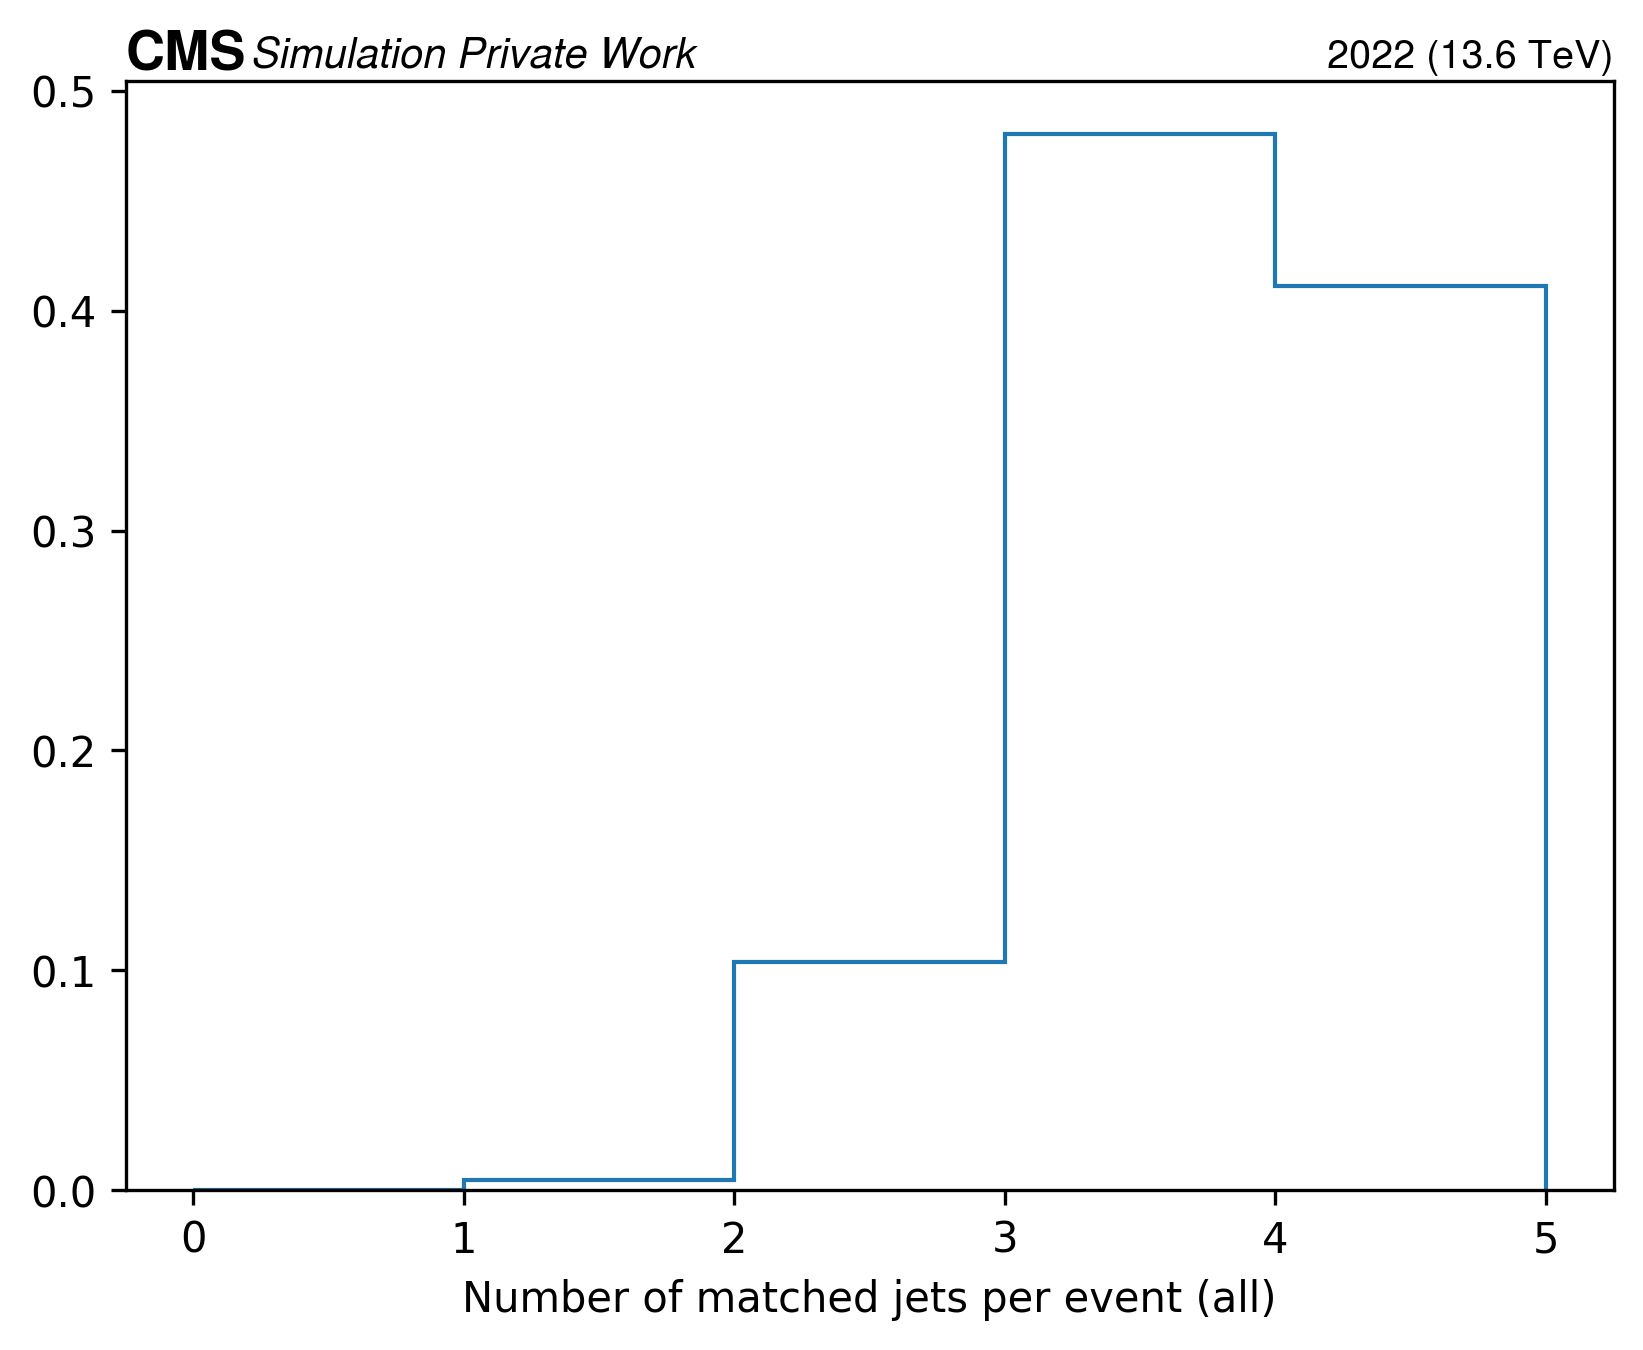

[2 3 4 ... 3 2 4]
85838
26025


In [25]:
n_jets=col["JetGoodBTagOrder_N"]
print(n_jets[n_jets>4])
print(ak.sum(n_jets))
print(len(n_jets))

n_jets=col["JetGood_N"]
print(n_jets[n_jets>4])
print(ak.sum(n_jets))
print(len(n_jets))

n_matched_jets=col["JetGoodBTagOrderMatched_N"]
print(n_matched_jets)
print(ak.sum(n_matched_jets))
print(len(n_matched_jets))

# histo with the number of matched jets
plt.hist(n_matched_jets,bins=range(0,6), histtype='step', label='matched',density=True)
# x label
plt.xlabel('Number of matched jets per event (all)')
hep.cms.label(
            year="2022",
            com="13.6",
            # label=f"Private Work ({correct_eta_bins[i]} <"
            # + r"$\eta^{Gen}$"
            # + f"< {correct_eta_bins[i+1]})",
            label=f"Private Work",
        )
plt.show()

n_matched_partons=col["PartonMatched_N"]
print(n_matched_partons)
print(ak.sum(n_matched_partons))
print(len(n_matched_partons))


[2 3 4 ... 3 2 4]
[[0.999, 0.994], [0.999, 0.942, 0.92], ... 0.953], [0.956, 0.953, 0.802, 0.18]]
[[True, True], [True, True, True], ... [True, True], [True, True, True, False]]
[2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 3, 3, 3, 3, ... 2, 4, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3]
26021
76297


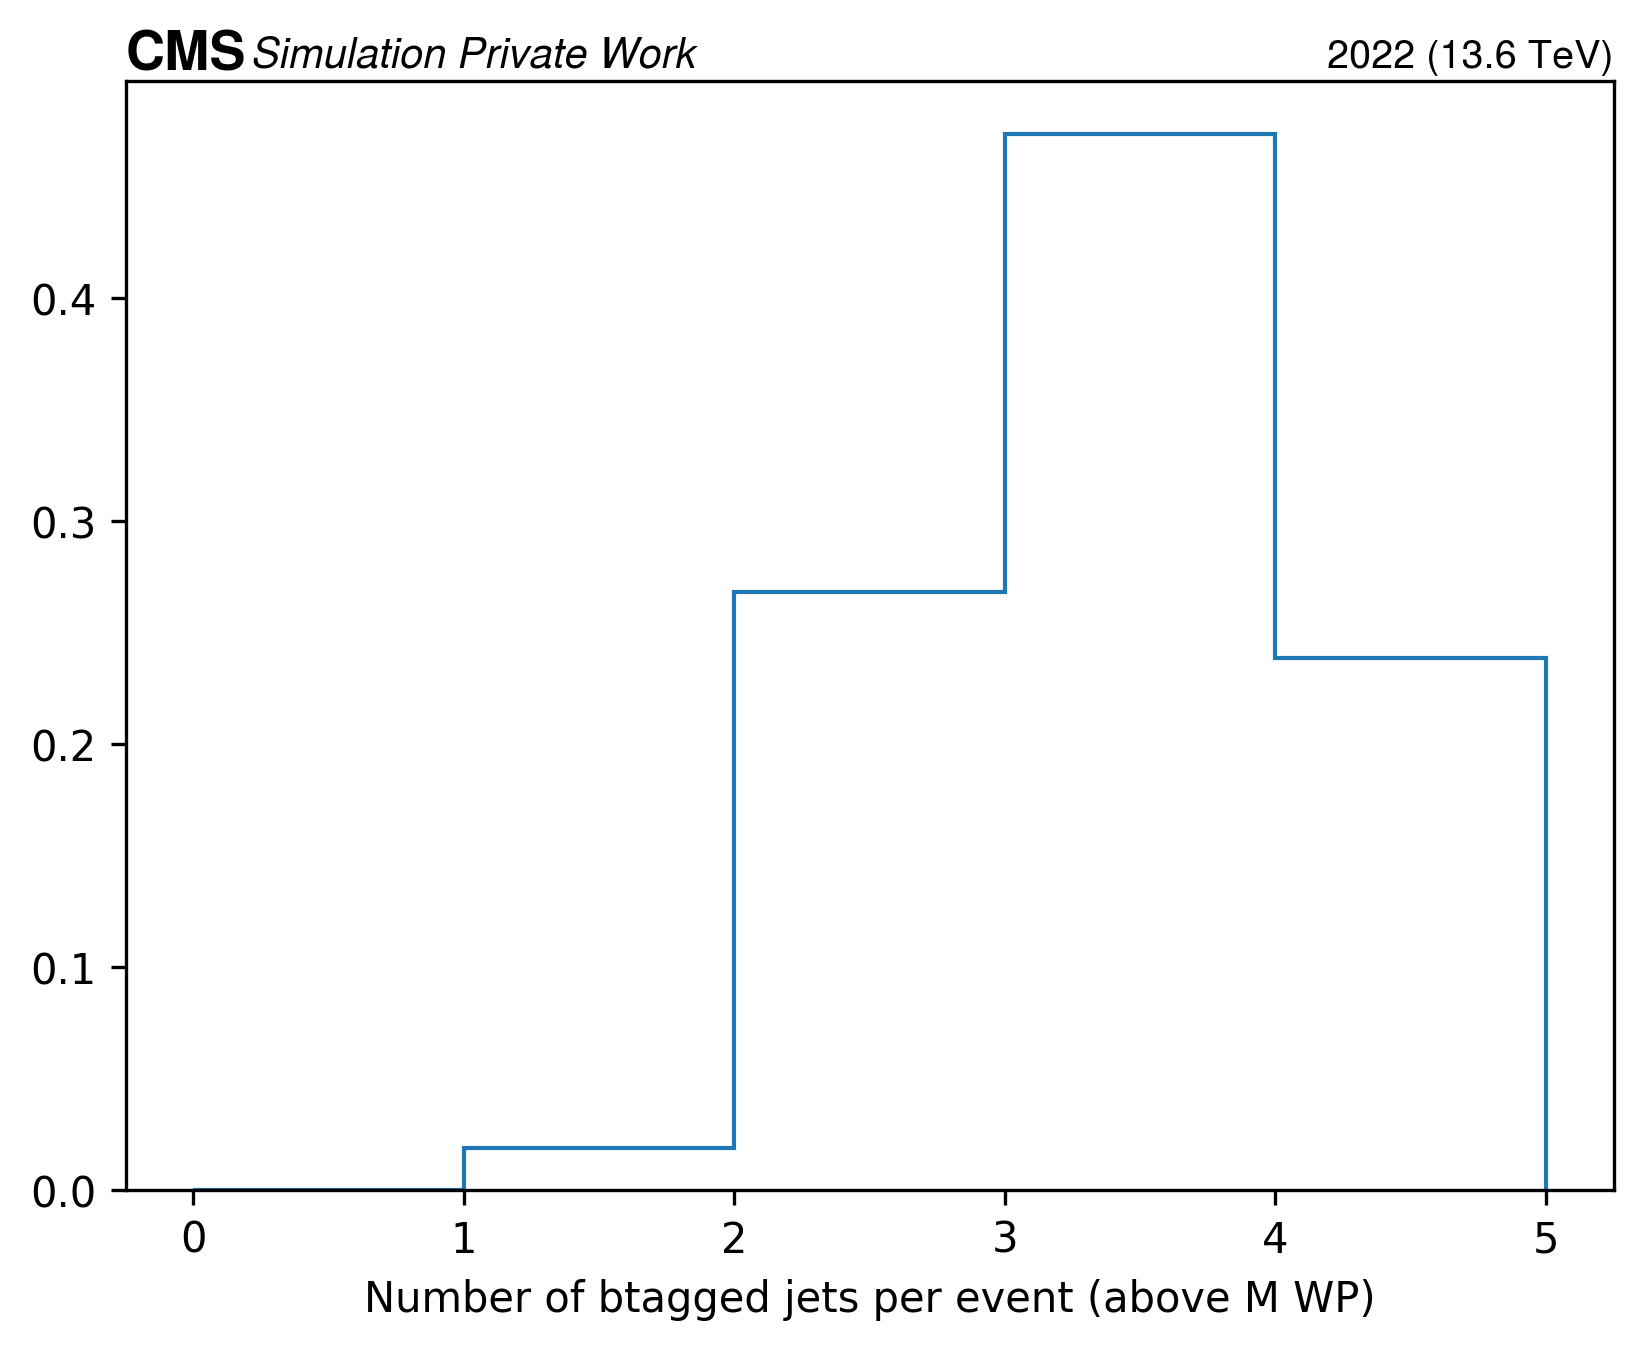

0.23873198847262248


In [26]:
n_matched_jets=col["JetGoodBTagOrderMatched_N"]
print(n_matched_jets)
jets_btag_matched=col["JetGoodBTagOrderMatched_btagPNetB"]

unflat_btag_matched_jets=ak.unflatten(jets_btag_matched,n_matched_jets)
print(unflat_btag_matched_jets)

#btag>0.2605
btag_mask=unflat_btag_matched_jets>0.2605
print(btag_mask)
#number of btagged jets
n_btag=ak.sum(btag_mask,axis=1)
print(n_btag)
print(len(n_btag[n_btag!=0])       )
ntot_btag=ak.sum(n_btag)
print(ntot_btag)
#histo
plt.hist(n_btag,bins=range(0,6), histtype='step', label='matched',density=True)
# x label
hep.cms.label(
            year="2022",
            com="13.6",
            # label=f"Private Work ({correct_eta_bins[i]} <"
            # + r"$\eta^{Gen}$"
            # + f"< {correct_eta_bins[i+1]})",
            label=f"Private Work",
        )
plt.xlabel('Number of btagged jets per event (above M WP)')
plt.show()

print(len(n_btag[n_btag==4])/len(n_btag))


[     0      4      8 ... 104088 104092 104096]


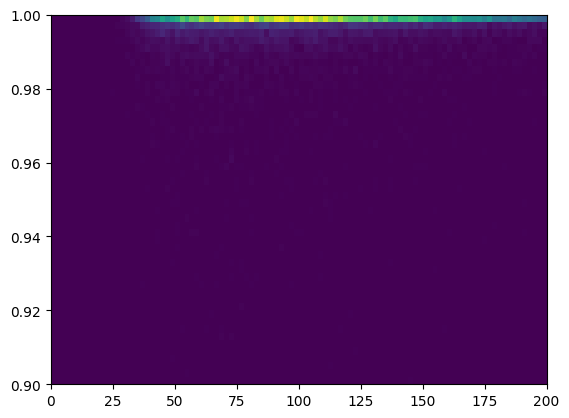

26025
[False False False ... False False False]
[68.75    72.8125  72.75    73.125   79.125   73.375   75.9375  74.
 59.25    74.625   72.8125  72.6875  76.0625  78.5     72.375   65.3125
 66.      71.5625  63.40625 74.125   78.5625  68.6875  69.3125  78.6875
 79.5625  79.3125  73.      70.9375 ]
26025
[56.25    52.46875 46.71875 52.25    53.      54.90625 56.6875  59.25
 57.4375  54.875   58.46875 57.28125 49.0625  56.15625 56.625   56.0625
 59.59375 56.53125 59.59375 59.46875 54.6875  58.6875  55.65625 59.90625
 59.09375 58.5625  51.59375 54.9375 ]
28
328
380
[False False False ... False False False]
680
680


In [6]:
index=np.array(range(0,len(col['JetGoodBTagOrder_pt']), 4))
print(index)

#histo 2d of the fisrt jet pt vs btag
import matplotlib.pyplot as plt
plt.hist2d(col['JetGoodBTagOrder_pt'][index],col['JetGoodBTagOrder_btagPNetB'][index],bins=(100,50),range=((0,200),(0.9,1)))
plt.show()

pt_lead=col['JetGoodPtOrder_pt'][index]
index_sub=np.array(range(1,len(col['JetGoodBTagOrder_pt']), 4))
pt_sublead=col['JetGoodPtOrder_pt'][index_sub]
print(len(pt_lead))

mask = (pt_lead<80) & (pt_sublead<60)
print(mask)
print((pt_lead[mask]))

print(len(pt_sublead))
print((pt_sublead[mask]))
print(len(pt_sublead[mask]))
print(len(pt_lead[(pt_lead<80)]))
print(len(pt_sublead[(pt_sublead<60)]))

mask_or = (pt_lead<80) | (pt_sublead<60)
print(mask_or)
print(len(pt_lead[mask_or]))
print(len(pt_sublead[mask_or]))


In [7]:

# n_parton=col["PartonMatched_N"]
# print((n_parton[n_parton<2]))
# print(len(col["JetGood_pt"][col["JetGood_pt"]>80]))

# i=range(0,len(col_matched["JetGood_pt"]),4)
# print(i)

# jet_match_eta=col["JetGoodBTagOrderMatched_eta"]
# print(len(jet_match_eta[abs(jet_match_eta)>2.5]))
# print(len(jet_match_eta[abs(jet_match_eta)<2.5]))
# print(len(jet_match_eta))
print("matched")
jet_match_btag=col["JetGoodBTagOrderMatched_btagPNetB"]
print(len(jet_match_btag[jet_match_btag<0.2605]))
print(len(jet_match_btag[jet_match_btag>0.2605]))
print(len(jet_match_btag))

print("\n all")
jet_btag=col["JetGood_btagPNetB"]
print(len(jet_btag[jet_btag<0.2605]))
print(len(jet_btag[jet_btag>0.2605]))
print(len(jet_btag))

matched
9541
76297
85838

 all
37704
79469
117173


In [8]:
pnet=col["JetGoodBTagOrderMatched_btagPNetB"]
mask_loose=pnet>0.2605
print(mask_loose)
mask_loose=ak.mask(mask_loose,mask_loose)
print(len(mask_loose))
n_matched = col["JetGoodBTagOrderMatched_N"]
print(ak.sum(n_matched))


unflat_mask_pnet= ak.unflatten(mask_loose,n_matched)
print((unflat_mask_pnet[-2:]))

pnet_unflat = ak.unflatten(pnet, n_matched)
print((pnet_unflat[-2:]))


# pnet_high=pnet[~ak.is_none(mask_loose)]
pnet_high=ak.mask(pnet, mask_loose)
print(pnet_high[-5:])

print(~ak.is_none(mask_loose)[-5:])

pnet_high_unflat = ak.unflatten(pnet_high, n_matched)
print((pnet_high_unflat[-2:]))

num_matched_high= ak.num(pnet_high_unflat[~ak.is_none(pnet_high_unflat, axis=1)])
print(num_matched_high[-10:]  )

# num_matched_high= ak.num(pnet_high_unflat)
# print(num_matched_high[-3:]  )
pnet_mask=pnet_unflat[num_matched_high==4]
print(len(pnet_mask))

num_jets=ak.sum(num_matched_high)
print(num_jets)

[ True  True  True ...  True  True False]
85838
85838
[[True, True], [True, True, True, None]]
[[0.999, 0.953], [0.956, 0.953, 0.802, 0.18]]
[0.953, 0.956, 0.953, 0.802, None]
[True, True, True, True, False]
[[0.999, 0.953], [0.956, 0.953, 0.802, None]]
[3, 3, 2, 3, 3, 2, 3, 3, 2, 3]
6213
76297


In [9]:
import numpy as np
import matplotlib.pyplot as plt


def plot_histos(bins, reco, pnet, pnet_neutrino, num):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(
        reco,
        bins,
        label=f"RecoHiggs{num}Mass",
        color="blue",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet,
        bins,
        label=f"PNetRegRecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet_neutrino,
        bins,
        label=f"PNetRegNeutrinoRecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.legend(loc="upper right")
    ax.text(
        0.75,
        0.5,
        "mean reco: {:.2f}\nmean pnet: {:.2f}\nmean pnet neutrino: {:.2f}\nstd dev reco: {:.2f}\nstd dev pnet: {:.2f}\nstd dev pnet neutrino: {:.2f}".format(
            np.mean(reco),
            np.mean(pnet),
            np.mean(pnet_neutrino),
            np.std(reco),
            np.std(pnet),
            np.std(pnet_neutrino),
        ),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.show()

In [10]:
print(o["columns"])
print(len(col["events_GenHiggs1Mass"]))

{'GluGlutoHHto4B': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'lepton_veto': {'PartonMatched_N': column_accumulator(array([3, 3, 2, ..., 2, 3, 4])), 'PartonMatched_provenance': column_accumulator(array([2., 2., 1., ..., 1., 2., 1.])), 'PartonMatched_pdgId': column_accumulator(array([-5.,  5.,  5., ...,  5., -5., -5.])), 'PartonMatched_dRMatchedJet': column_accumulator(array([0.00912185, 0.02242409, 0.02913366, ..., 0.05863036, 0.03725145,
       0.03713828])), 'PartonMatched_genPartIdxMother': column_accumulator(array([12., 12., 13., ..., 14., 15., 14.])), 'PartonMatched_pt': column_accumulator(array([243.  , 174.  , 212.  , ...,  59.25,  43.  , 199.5 ])), 'PartonMatched_eta': column_accumulator(array([1.09765625, 1.6640625 , 1.6640625 , ..., 1.9921875 , 1.4765625 ,
       0.984375  ])), 'PartonMatched_phi': column_accumulator(array([-0.66015625, -0.45703125,  2.453125  , ...,  3.046875  ,
       -0.890625  , -2.78125   ])), 'JetGoodBTagOrderMatched_N': co

In [11]:
print(col['PartonMatched_provenance'][:20])
print(col['PartonMatched_genPartIdxMother'][:20])
print(col['PartonMatched_pdgId'][:20])


[1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2.]
[13. 13. 15. 16. 15. 16. 15. 16. 15. 18. 17. 17. 18. 17. 16. 17. 16. 19.
 18. 18.]
[ 5. -5. -5. -5.  5.  5.  5. -5. -5. -5.  5. -5.  5. -5. -5.  5.  5. -5.
 -5.  5.]


In [12]:
print(len(col['PartonMatched_provenance'][col['PartonMatched_provenance']==1]))
print(len(col['PartonMatched_provenance'][col['PartonMatched_provenance']==2]))


44562
41276


In [13]:
import awkward as ak

dr1 = col["JetGoodBTagOrderMatched_dRMatchedJet"]
dr2 = col["PartonMatched_dRMatchedJet"]
# print(dr1[dr1>0.38])
# print(dr2[dr2>0.38])
i = 16
pnet = col["JetGoodBTagOrder_btagPNetB"]
# print((pnet[pnet<0.2605]))
print((pnet[pnet < 0.0]))
print(len(pnet))

n_pnet = col["JetGoodBTagOrder_N"]
print(ak.sum(n_pnet))

# given the number of jets in each event, we can find the number of jets with pnet<0.2605 in each event
mask_veto_pnet = pnet < 0.2605
mask_veto_pnet = ak.mask(mask_veto_pnet, mask_veto_pnet)
print(len(mask_veto_pnet))

unflattened_mask_veto_pnet = ak.unflatten(mask_veto_pnet, n_pnet)
print((unflattened_mask_veto_pnet[:3]))

mask_pnet = ak.where(
    ak.is_none(unflattened_mask_veto_pnet), False, unflattened_mask_veto_pnet
)
mask_pnet = ak.num(unflattened_mask_veto_pnet[~ak.is_none(unflattened_mask_veto_pnet, axis=1)])
print(len(mask_pnet[mask_pnet==0]))
print(len(mask_pnet[mask_pnet>0]))
print(len(mask_pnet[mask_pnet]))
# pnet_vetoed  = pnet[mask_pnet]
# print(len(pnet_vetoed))

[]
104100
104100
104100
[[None, None, None, True], [None, None, None, True], [None, None, None, None]]
7289
18736
26025


In [14]:
print(col['JetGoodBTagOrderMatched_btagPNetB'][:20])
print(col['JetGoodBTagOrderMatched_pt'][:20])
print(col['JetGoodBTagOrderMatched_eta'][:20])
print(col['JetGoodBTagOrderMatched_phi'][:20])


[0.99902344 0.99365234 0.99853516 0.94189453 0.91992188 0.99951172
 0.99707031 0.99560547 0.33959961 0.99951172 0.99804688 0.78173828
 0.02784729 0.99951172 0.99902344 0.99365234 0.78369141 0.99902344
 0.82421875 0.06231689]
[162.75    163.125   122.25    114.6875   89.0625   68.9375   96.5
  63.65625 111.5625   58.25    114.6875   77.3125   55.0625  114.5625
 214.375    53.4375   50.46875  98.9375   95.25    167.5    ]
[-0.37402344 -0.49786377 -0.18508911  0.5447998  -0.21005249  0.05167389
 -1.6628418   1.58959961 -0.98986816  2.31445312  0.42144775  0.98010254
  2.21142578  1.0222168   0.89428711  2.09277344  1.74023438  0.40869141
 -0.98181152 -1.24511719]
[ 1.27758789  1.81762695  1.61328125 -2.49853516  0.4407959  -1.47265625
  1.45776367 -1.10791016  2.18261719  1.80297852  1.80737305  0.75952148
 -0.97021484  2.13916016 -0.95898438  1.39770508 -1.64306641 -0.27947998
  1.40332031  2.97265625]


In [15]:
print(col["JetGoodBTagOrderMatched_pt"][:16])
print(col["JetGoodBTagOrder_pt"][:16])
print(col["JetGood_pt"][:16])
print(col["JetGoodPtOrder_pt"][:16])
print("\n\n")
print(col["JetGoodBTagOrderMatched_btagPNetB"][:16])
print(col["JetGoodBTagOrder_btagPNetB"][:16])
print(col["JetGood_btagPNetB"][:16])
print(col["JetGoodPtOrder_btagPNetB"][:16])

[162.75    163.125   122.25    114.6875   89.0625   68.9375   96.5
  63.65625 111.5625   58.25    114.6875   77.3125   55.0625  114.5625
 214.375    53.4375 ]
[162.75    163.125    31.8125   57.09375 122.25    114.6875   89.0625
  64.625    68.9375   96.5      63.65625 111.5625   58.25    114.6875
  77.3125   55.0625 ]
[162.75    163.125    31.8125   57.09375  81.6875   67.3125  122.25
 114.6875   89.0625   64.625    68.9375   96.5      63.65625 111.5625
  58.25    114.6875 ]
[162.75    163.125    57.09375  31.8125  122.25    114.6875   89.0625
  64.625   111.5625   96.5      68.9375   63.65625 114.6875   77.3125
  58.25     55.0625 ]



[0.99902344 0.99365234 0.99853516 0.94189453 0.91992188 0.99951172
 0.99707031 0.99560547 0.33959961 0.99951172 0.99804688 0.78173828
 0.02784729 0.99951172 0.99902344 0.99365234]
[0.99902344 0.99365234 0.30322266 0.05044556 0.99853516 0.94189453
 0.9199219  0.00663376 0.9995117  0.9970703  0.99560547 0.3395996
 0.9995117  0.9980469  0.7817383  0.02784

In [16]:
print(len(col["JetGood_pt"]))
print(len(col["JetGoodBTagOrder_pt"]))
print(len(col["JetGoodBTagOrderMatched_pt"]))


117173
104100
85838


In [17]:
print(o["variables"]["PNetRegRecoHiggs2Mass"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])
histos=[]
for v in ["PNetRegRecoHiggs1Mass","RecoHiggs1Mass"]:
    histos.append(o["variables"][v]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])

Hist(
  StrCategory(['baseline', 'four_jet', 'full_parton_matching', 'jet_btag_lead', 'jet_btag_loose', 'jet_btag_medium', 'jet_pt', 'jet_pt_copy', 'jet_pt_copy2', 'lepton_veto'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  Regular(30, 60, 200, name='events.PNetRegRecoHiggs2Mass', label='PNetRegRecoHiggs2Mass'),
  storage=Weight()) # Sum: WeightedSum(value=1691.31, variance=40.5874) (WeightedSum(value=1711.95, variance=41.0386) with flow)


[105.12410736 112.83187103 117.55789948 ... 109.36047363 120.24874115
  88.23658752]
mean 112.71274151467065
std dev 21.622663264307352
[ 98.18632507 109.87957764 111.03018951 ... 109.20422363 125.08656311
  80.32064819]
mean 111.9794916033923
std dev 20.243086486820683
[111.85739899 112.19966125 123.18336487 ... 126.67208099 127.76164246
  82.10492706]
mean 118.4276513682709
std dev 20.41615477087267


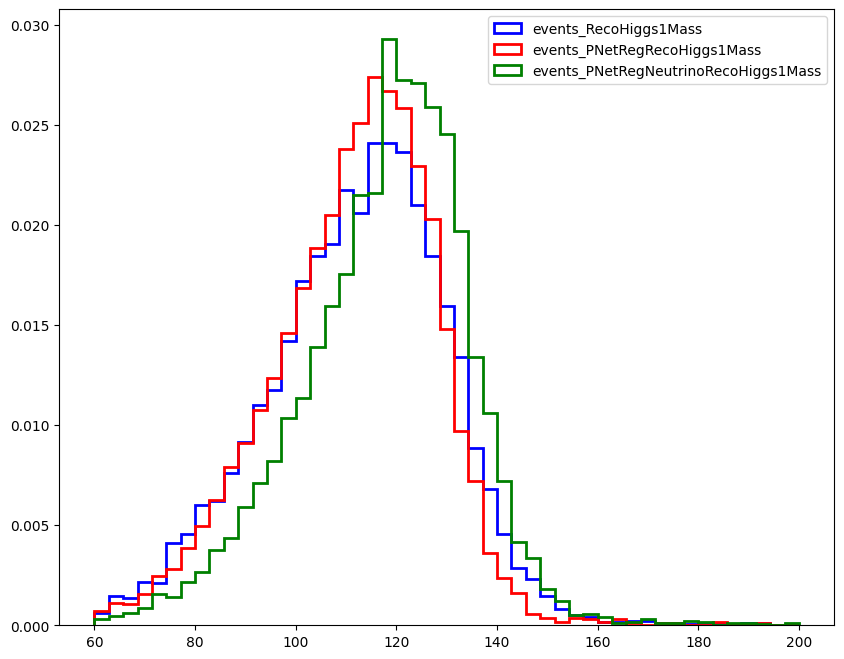

[117.31536102 112.79988098 106.38014221 ... 131.66096497 124.02135468
 114.34403992]
mean 114.52342546289098
std dev 25.7627239430544
[116.55523682  97.50945282 103.80751038 ... 124.03588104 118.36714935
 120.70675659]
mean 113.93882401855537
std dev 24.521492676813853
[118.74769592 109.70329285 120.23648834 ... 126.97335815 128.72463989
 128.49632263]
mean 120.71696215680896
std dev 25.061288940605063


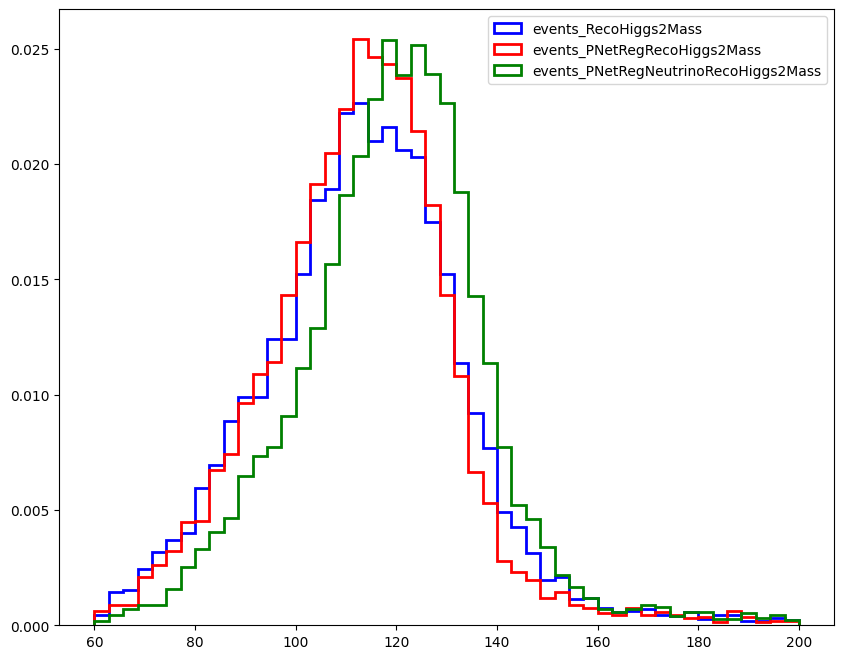

In [18]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(60, 200, 50)
colors=["blue","red", "green"]
k=0

fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs1Mass", "events_PNetRegRecoHiggs1Mass", "events_PNetRegNeutrinoRecoHiggs1Mass"]:
    a=np.array(col[c])
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()


k=0
fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs2Mass", "events_PNetRegRecoHiggs2Mass", "events_PNetRegNeutrinoRecoHiggs2Mass"]:
    a=np.array(col[c])
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()

10704
10704
10704
10704
21408
21408


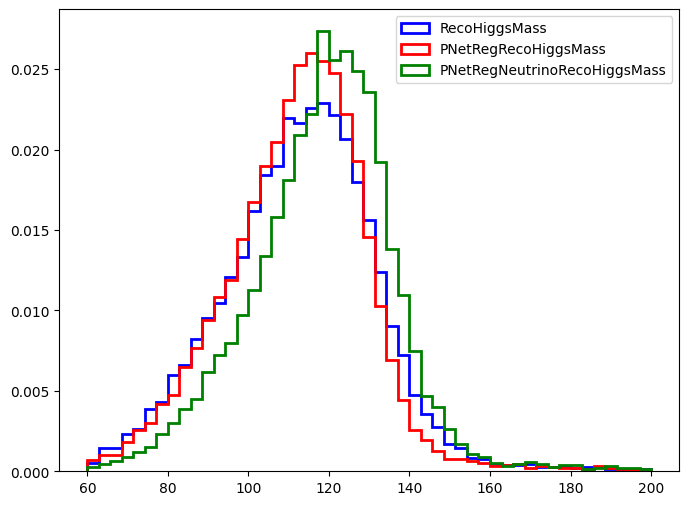

[105.12410736 112.83187103 117.55789948 ... 131.66096497 124.02135468
 114.34403992]
mean reco 113.61808348878083
mean pnet 112.95915781097384
mean pnet nutrino 119.57230676253992
std dev reco 23.800176467705302
std dev pnet 22.50561758060076
std dev pnet neutrino 22.885672930197824


In [19]:
print(len(col["events_RecoHiggs1Mass"]))
print(len(col["events_RecoHiggs2Mass"]))
print(len(col["events_PNetRegRecoHiggs1Mass"]))
print(len(col["events_PNetRegRecoHiggs2Mass"]))
higgs_mass=np.concatenate((col["events_RecoHiggs1Mass"], col["events_RecoHiggs2Mass"]))
pnet_higgs_mass=np.concatenate((col["events_PNetRegRecoHiggs1Mass"], col["events_PNetRegRecoHiggs2Mass"]))
pnet_neutrino_higgs_mass=np.concatenate((col["events_PNetRegNeutrinoRecoHiggs1Mass"], col["events_PNetRegNeutrinoRecoHiggs2Mass"]))
print(len(higgs_mass))
print(len(pnet_higgs_mass))
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(higgs_mass, bins, label="RecoHiggsMass", color="blue", histtype='step', linewidth=2, density=True)
ax.hist(pnet_higgs_mass, bins, label="PNetRegRecoHiggsMass", color="red", histtype='step', linewidth=2, density=True)
ax.hist(pnet_neutrino_higgs_mass, bins, label="PNetRegNeutrinoRecoHiggsMass", color="green", histtype='step', linewidth=2, density=True)
ax.legend(loc='upper right')
plt.show()
print(higgs_mass)

#average mass
print("mean reco", np.mean(higgs_mass))
print("mean pnet",np.mean(pnet_higgs_mass))
print("mean pnet nutrino",np.mean(pnet_neutrino_higgs_mass))

#std dev
print("std dev reco",np.std(higgs_mass))
print("std dev pnet",np.std(pnet_higgs_mass))
print("std dev pnet neutrino",np.std(pnet_neutrino_higgs_mass))


In [20]:
print(col["events_GenHiggs1Pt"])
print(col["events_GenHiggs2Pt"])
print(col["events_RecoHiggs1Pt"])
print(col["events_RecoHiggs2Pt"])
print(col["events_PNetRegRecoHiggs1Pt"])
print(col["events_PNetRegRecoHiggs2Pt"])
print(col["events_PNetRegNeutrinoRecoHiggs1Pt"])
print(col["events_PNetRegNeutrinoRecoHiggs2Pt"])

for type_jet in ["Gen", "Reco", "PNetRegReco", "PNetRegNeutrinoReco"]:
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"][col[f"events_{type_jet}Higgs1Pt"]>=col[f"events_{type_jet}Higgs2Pt"]]))
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"][col[f"events_{type_jet}Higgs1Pt"]<=col[f"events_{type_jet}Higgs2Pt"]]))
    # print(type_jet, (col[f"events_{type_jet}Higgs2Pt"][col[f"events_{type_jet}Higgs1Pt"]<=col[f"events_{type_jet}Higgs2Pt"]]))


[228.16520691 190.40377808 265.50183105 ... 216.15873718 186.50114441
 254.05854797]
[180.75045776  19.43322182 185.04325867 ... 156.96250916 136.13053894
 178.4747467 ]
[194.61988831 167.29368591 255.48687744 ... 200.04499817 177.34028625
 153.36315918]
[130.39834595  20.98952103 158.14492798 ... 159.93005371 138.0690918
 158.45600891]
[183.22941589 159.53535461 239.11392212 ... 198.74519348 184.60661316
 137.1811676 ]
[130.69924927  19.06987953 150.78823853 ... 151.1723175  128.97633362
 173.60668945]
[207.28369141 163.01966858 268.75140381 ... 232.84877014 188.61419678
 140.66427612]
[133.21974182  28.15537834 178.46820068 ... 155.41691589 143.06315613
 178.69483948]
Gen 10669
Gen 35
Reco 7966
Reco 2738
PNetRegReco 8084
PNetRegReco 2620
PNetRegNeutrinoReco 8159
PNetRegNeutrinoReco 2545


order  higgs 1 and 2 based on the reco higgs pt

[194.61988831 167.29368591 255.48687744 ... 200.04499817 177.34028625
 153.36315918]
[130.39834595  20.98952103 158.14492798 ... 159.93005371 138.0690918
 158.45600891]
[105.12410736 112.83187103 117.55789948 ... 109.36047363 120.24874115
  88.23658752]
[117.31536102 112.79988098 106.38014221 ... 131.66096497 124.02135468
 114.34403992]
[105.12410736 112.83187103 117.55789948 ... 109.36047363 120.24874115
 114.34403992]
[117.31536102 112.79988098 106.38014221 ... 131.66096497 124.02135468
  88.23658752]
[ 98.18632507 109.87957764 111.03018951 ... 109.20422363 125.08656311
  80.32064819]
[116.55523682  97.50945282 103.80751038 ... 124.03588104 118.36714935
 120.70675659]
[111.85739899 112.19966125 123.18336487 ... 126.67208099 127.76164246
  82.10492706]
[118.74769592 109.70329285 120.23648834 ... 126.97335815 128.72463989
 128.49632263]


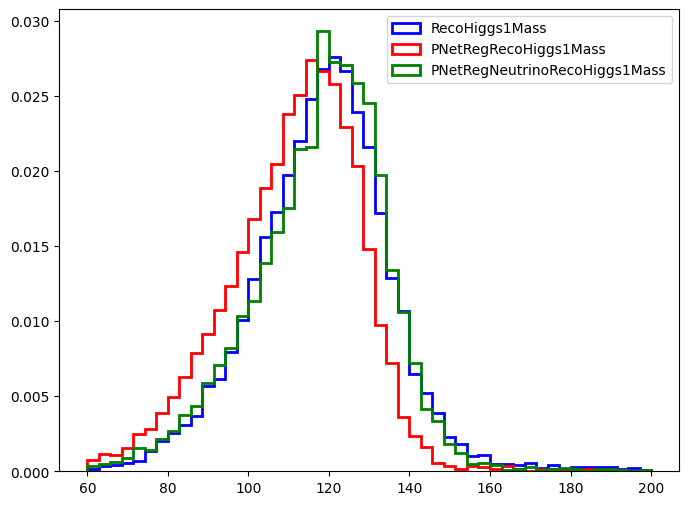

mean reco 119.29032856181419
mean pnet 111.9794916033923
mean pnet neutrino 118.4276513682709
std dev reco 21.09467342651316
std dev pnet 20.243086486820683
std dev pnet neutrino 20.41615477087267


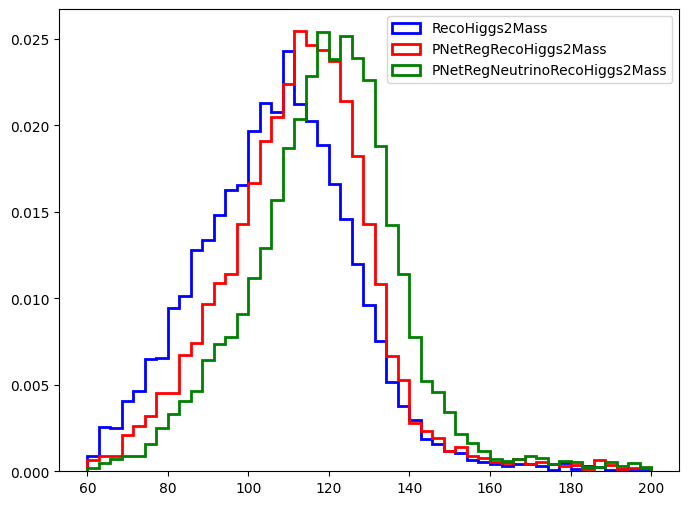

mean reco 107.94583841574745
mean pnet 113.93882401855537
mean pnet neutrino 120.71696215680896
std dev reco 24.971239946776436
std dev pnet 24.521492676813853
std dev pnet neutrino 25.061288940605063


[89.45117188 72.72025299]
[106.38858795  86.37263489]
[122.77397156  86.3664856 ]


In [21]:
# oirder higgs 1 and 2 based on the reco higgs pt
print(col["events_RecoHiggs1Pt"])
print(col["events_RecoHiggs2Pt"])

higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs2Pt"],
    col["events_RecoHiggs1Mass"],
    col["events_RecoHiggs2Mass"],
)
higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs2Pt"],
    col["events_RecoHiggs2Mass"],
    col["events_RecoHiggs1Mass"],
)
pnet_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegRecoHiggs1Mass"],
    col["events_PNetRegRecoHiggs2Mass"],
)
pnet_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegRecoHiggs2Mass"],
    col["events_PNetRegRecoHiggs1Mass"],
)
pnet_neutrino_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegNeutrinoRecoHiggs1Mass"],
    col["events_PNetRegNeutrinoRecoHiggs2Mass"],
)
pnet_neutrino_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegNeutrinoRecoHiggs2Mass"],
    col["events_PNetRegNeutrinoRecoHiggs1Mass"],
)


higg1_mass = np.array(col["events_RecoHiggs1Mass"])
higg2_mass = np.array(col["events_RecoHiggs2Mass"])
print(higg1_mass)
print(higg2_mass)
print(higgs1_mass_order)
print(higgs2_mass_order)
print(pnet_higgs1_mass_order)
print(pnet_higgs2_mass_order)
print(pnet_neutrino_higgs1_mass_order)
print(pnet_neutrino_higgs2_mass_order)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs1_mass_order,
    bins,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs1_mass_order,
    bins,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs1_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()



print("mean reco", np.mean(higgs1_mass_order))
print("mean pnet", np.mean(pnet_higgs1_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs1_mass_order))
print("std dev reco", np.std(higgs1_mass_order))
print("std dev pnet", np.std(pnet_higgs1_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs1_mass_order))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs2_mass_order,
    bins,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs2_mass_order,
    bins,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs2_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()

print("mean reco", np.mean(higgs2_mass_order))
print("mean pnet", np.mean(pnet_higgs2_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs2_mass_order))
print("std dev reco", np.std(higgs2_mass_order))
print("std dev pnet", np.std(pnet_higgs2_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs2_mass_order))


mask_mass_order = pnet_neutrino_higgs1_mass_order > pnet_higgs1_mass_order
# & (
#     pnet_neutrino_higgs1_mass_order > higg1_mass
# )
print("\n")
print(pnet_neutrino_higgs1_mass_order[~mask_mass_order])
print(pnet_higgs1_mass_order[~mask_mass_order])
print(higg1_mass[~mask_mass_order])

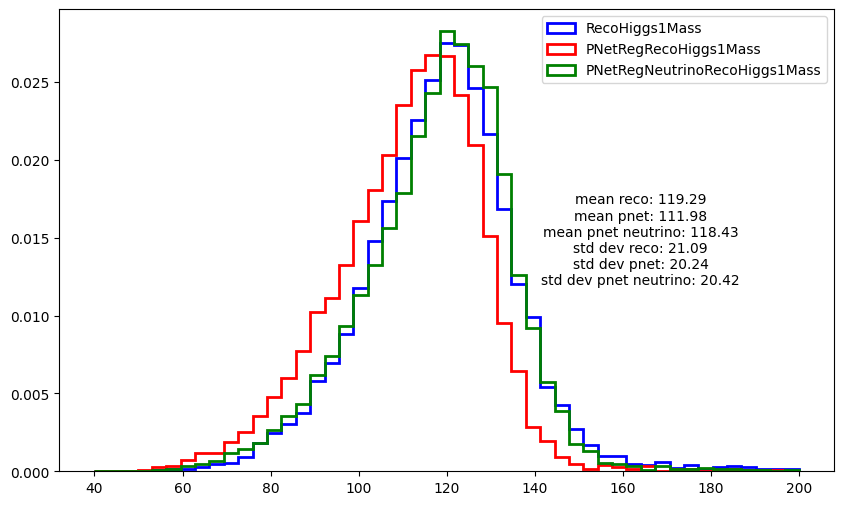

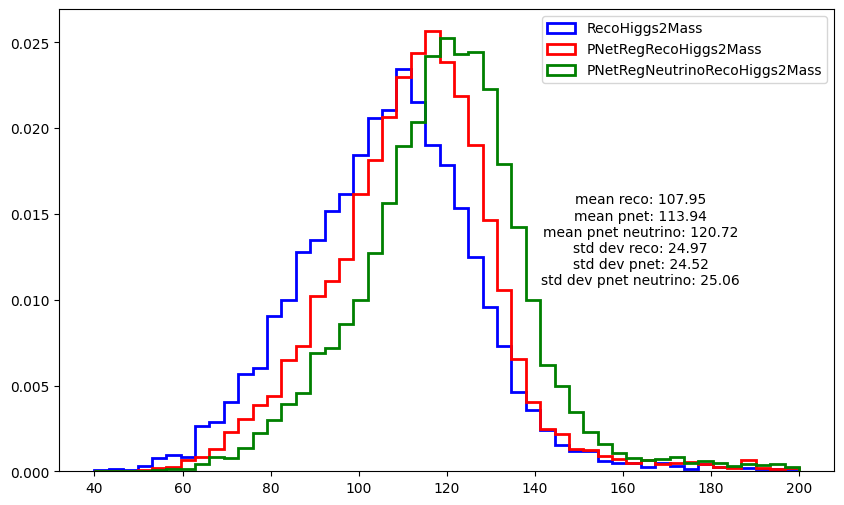

In [22]:
bins=np.linspace(40, 200, 50)
plot_histos(bins, higgs1_mass_order, pnet_higgs1_mass_order, pnet_neutrino_higgs1_mass_order, 1)
plot_histos(bins, higgs2_mass_order, pnet_higgs2_mass_order, pnet_neutrino_higgs2_mass_order, 2)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[0.84179715 0.90543793 0.94419306 ... 0.87825799 0.96497266 0.70958289]
[0.94145811 0.90510575 0.85375958 ... 1.05893938 0.99453218 0.91764679]
[0.78624181 0.88174677 0.89176427 ... 0.87700316 1.00379524 0.64592432]
[0.93535809 0.78241542 0.83311278 ... 0.9976114  0.94919089 0.96870959]
[0.895715   0.90036466 0.98937527 ... 1.01728497 1.02526223 0.66027317]
[0.95295262 0.88025874 0.96496443 ... 1.02123731 1.03224802 1.0312233 ]


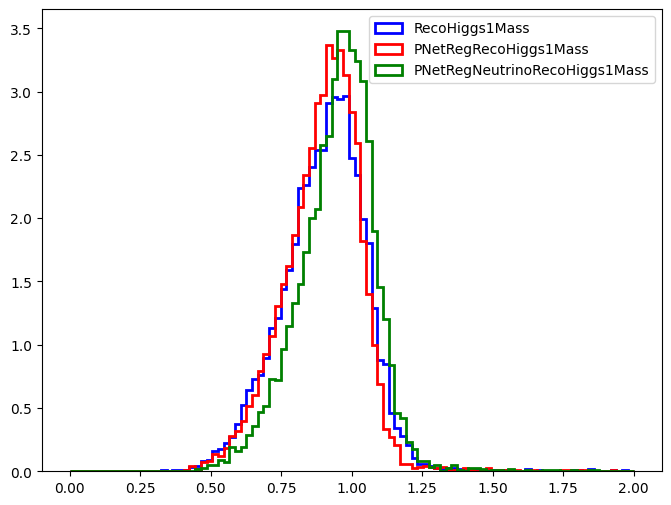

mean reco 0.9051215123793878
mean pnet 0.8992349326611003
mean pnet nutrino 0.9510112228888041
std dev reco 0.17470488068855203
std dev pnet 0.16370837711203995
std dev pnet neutrino 0.16511482737679395


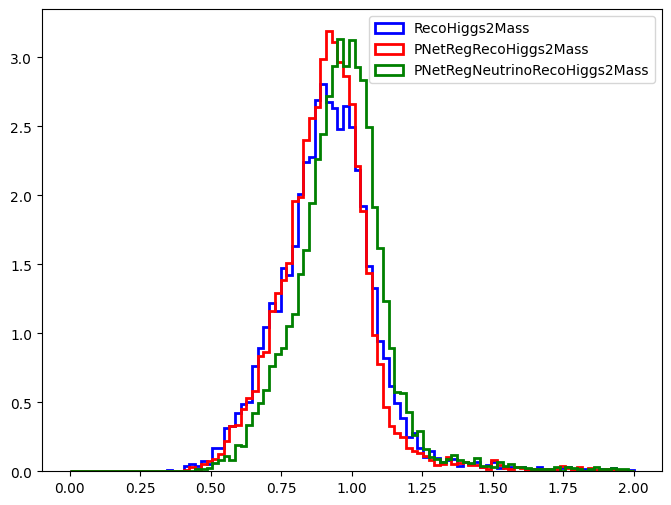

mean reco 0.9195421895958247
mean pnet 0.914848437266367
mean pnet nutrino 0.9692715743358534
std dev reco 0.2074120365215574
std dev pnet 0.19747704920655562
std dev pnet neutrino 0.20183282064237681


In [23]:
bins_ratio = np.linspace(0, 2, 100)
mask_pt1=np.array(col["events_RecoHiggs1Pt"]>=100) & np.array(col["events_RecoHiggs1Pt"]<=200)
mask_pt2=np.array(col["events_RecoHiggs2Pt"]>=100) & np.array(col["events_RecoHiggs2Pt"]<=200)

mask_pt1=np.ones_like(col["events_RecoHiggs1Pt"]).astype(bool)
mask_pt2=np.ones_like(col["events_RecoHiggs2Pt"]).astype(bool)
print(mask_pt1)
print(mask_pt2)
gen_higgs_mass1 = np.array(col["events_GenHiggs1Mass"][mask_pt1])
gen_higgs_mass2 = np.array(col["events_GenHiggs2Mass"][mask_pt2])
reco_ratio1 = np.array(col["events_RecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
reco_ratio2 = np.array(col["events_RecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
pnet_ratio1 = np.array(col["events_PNetRegRecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
pnet_ratio2 = np.array(col["events_PNetRegRecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
pnet_neutrino_ratio1 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
)
pnet_neutrino_ratio2 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
)

print(reco_ratio1)
print(reco_ratio2)
print(pnet_ratio1)
print(pnet_ratio2)
print(pnet_neutrino_ratio1)
print(pnet_neutrino_ratio2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio1,
    bins_ratio,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio1,
    bins_ratio,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio1,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio1))
print("mean pnet", np.mean(pnet_ratio1))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio1))
print("std dev reco", np.std(reco_ratio1))
print("std dev pnet", np.std(pnet_ratio1))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio1))


fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio2,
    bins_ratio,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio2,
    bins_ratio,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio2,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio2))
print("mean pnet", np.mean(pnet_ratio2))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio2))

print("std dev reco", np.std(reco_ratio2))
print("std dev pnet", np.std(pnet_ratio2))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio2))